In [943]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
%matplotlib inline
%config InlineBackend.figure_format ='retina'

#as it in the lecture notes, import tools

In [944]:
df=pd.read_csv('/Users/lilexin/Desktop/ECON628-lessdaa/project 1/drones copy.csv')

In [945]:
df.head(15).T
#check the first 15 obs, to have a direct image of what is the data about.
#use command .T cause there is no enough space for all columns

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Strike ID,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18
Bureau ID,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,B13,B14,B15
Date,6/17/04,5/8/05,11/5/05,12/1/05,1/13/06,10/30/06,1/16/07,4/27/07,6/19/07,11/2/07,12/3/07,1/29/08,2/28/08,3/16/08,5/14/08
Time,1/0/00,1/0/00,NaN,1/0/00,NaN,NaN,1/0/00,1/0/00,1/0/00,1/0/00,NaN,NaN,1/0/00,1/0/00,1/0/00
Location,Wana,Toorikhel,Mosaki,Haisori,Damadola,Chenegai,Zamazola,Saidgai,Mami Rogha,Danda Darpakhel,Jani Khel,Mir Ali,Azam Warsak,Dhook Pir Bagh,Damadola
Area,South Waziristan,North Waziristan,North Waziristan,North Waziristan,Bajaur Agency,Bajaur Agency,South Waziristan,North Waziristan,North Waziristan,North Waziristan,Bannu Frontier,North Waziristan,South Waziristan,South Waziristan,Bajaur Agency
Target,Nek Mohammed,Haitham al-Yemeni,Abu Hamza Rabia,Abu Hamza Rabia,Ayman al-Zawahiri; Abu Khabab al-Masri; Abd Ra...,Maulvi Liaqat,NaN,Maulvi Noor Mohammed,NaN,Jalalludin Haqqani,Shaykh Issa al-Masri,Abu Laith al-Libi,NaN,NaN,Abu Sulayman al-Jazairi
Target Group,NaN,NaN,NaN,NaN,AQ,AQ,Taliban,Taliban,Unknown,Haqqani,AQ,AQ,Unknown,AQ,AQ
Westerners involved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Minimum Total Killed,6,2,8,6,13,81,8,3,20,5,0,12,10,18,12


In [946]:
df.index

RangeIndex(start=0, stop=381, step=1)

In [947]:
#Part 1 start here


In [948]:
#In part one I will try to have an idea of what is this dataset about, and Visualize the numbers of victim killed in each area
#I write this comment after I've done this part, from the Title of Data, it is the death and injuring number under dron attacks

In [949]:
#part1--01 Visualize observations


In [950]:
#First let' have a look at the difference between Max and Min killed in total

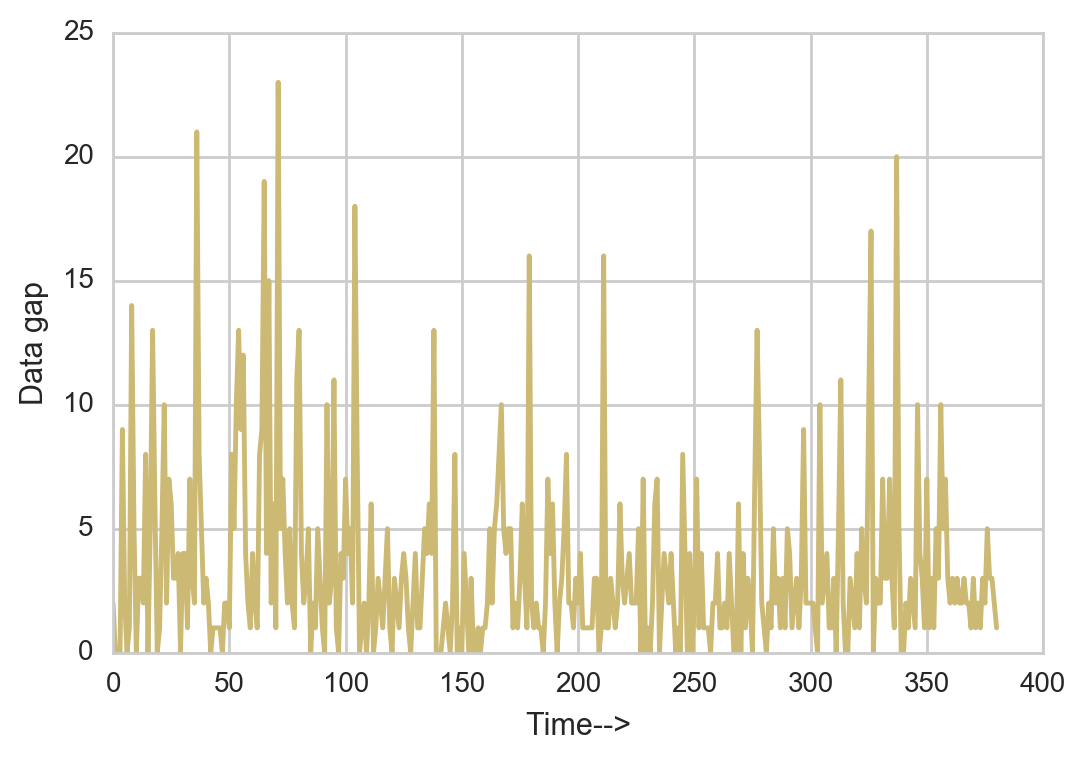

In [951]:
Max=df['Maximum Total Killed']
Min=df['Minimum Total Killed']
Dif=Max-Min
Dif.dropna(how='any')
plt.plot(Dif,color='Y')
plt.xlabel('Time-->')
plt.ylabel('Data gap')

In [952]:
#THe gap does not change too much, which means the information gathering process makes poor progress.

In [953]:
#part1--02 Victims Destribution Over time
#in This Part, I will try to classify victims in two three groups, and to show the graphs of the numeric distribution,
#as well as the quataties change over time

In [954]:
#Clean the data set first

In [955]:
df2=df.drop(['Time','Strike ID','Related ID','Short Summary','Notes','Westerners involved','Civilians Killed','Bureau ID','Number of deaths','Injured','Children Killed','Target','Target Group','Location','Minimum Total Killed','Maximum Total Killed','Pakistani approval'],axis=1)
df2
#Thoese variables above are not important, or they can be presented by other variables

,Date,Area,Mean Total Killed,AQ/TB Killed,Minimum civilians killed,Maximum civilians killed,Min injured,Max injured,Minimum children killed,Max children killed
0,6/17/04,South Waziristan,7.0,5,2.0,2.0,1.0,1.0,2.0,2.0
1,5/8/05,North Waziristan,2.0,1 al-Qaeda,NaN,NaN,NaN,NaN,NaN,NaN
2,11/5/05,North Waziristan,8.0,0,3.0,8.0,1.0,1.0,2.0,3.0
3,12/1/05,North Waziristan,5.0,1 al-Qaeda,2.0,3.0,NaN,NaN,2.0,2.0
4,1/13/06,Bajaur Agency,20.0,0-4,10.0,18.0,NaN,NaN,5.0,6.0
5,10/30/06,Bajaur Agency,82.0,NaN,80.0,82.0,3.0,3.0,68.0,70.0
6,1/16/07,South Waziristan,8.0,NaN,8.0,8.0,NaN,NaN,1.0,1.0
7,4/27/07,North Waziristan,4.0,0-4,3.0,4.0,3.0,9.0,NaN,NaN
8,6/19/07,North Waziristan,27.0,NaN,0.0,34.0,10.0,15.0,NaN,NaN
9,11/2/07,North Waziristan,8.0,5-10,NaN,NaN,6.0,12.0,NaN,NaN


In [956]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Mean Total Killed,283.0,9.088339,8.613199,0.0,NaN,NaN,NaN,82.0
Minimum civilians killed,173.0,2.404624,6.721052,0.0,NaN,NaN,NaN,80.0
Maximum civilians killed,173.0,5.497110,8.717547,0.0,NaN,NaN,NaN,82.0
Min injured,305.0,3.678689,3.725142,0.0,NaN,NaN,NaN,27.0
Max injured,305.0,5.265574,5.487273,0.0,NaN,NaN,NaN,50.0
Minimum children killed,69.0,2.434783,8.232786,0.0,NaN,NaN,NaN,68.0
Max children killed,68.0,2.941176,8.534185,0.0,NaN,NaN,NaN,70.0


In [957]:
print df2.info()
# the shape of df2 have been told 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 10 columns):
Date                        381 non-null object
Area                        381 non-null object
Mean Total Killed           283 non-null float64
AQ/TB Killed                41 non-null object
Minimum civilians killed    173 non-null float64
Maximum civilians killed    173 non-null float64
Min injured                 305 non-null float64
Max injured                 305 non-null float64
Minimum children killed     69 non-null float64
Max children killed         68 non-null float64
dtypes: float64(7), object(3)
memory usage: 29.8+ KB
None


In [958]:
#create a new set for grouping 
df3=df2
group=df3.groupby(['Area'])
print group

In [959]:
print group.mean()
print "\n===\n"
print group.median()
print '\n====\n'
print group.count()
print '\n====\n'
print group.max()

                               Mean Total Killed  Minimum civilians killed  \
Area                                                                         
Bajaur Agency                          35.250000                 31.333333   
Bannu Frontier                          3.333333                  0.000000   
Khyber Agency                          14.800000                  1.000000   
Khyber Pakhtunkhwa province                  NaN                  0.000000   
Kurram Agency                          10.571429                  0.666667   
North Waziristan                        8.020619                  2.158730   
North/South Waziristan                       NaN                  0.000000   
Orakzai Agency                         14.000000                  5.000000   
Orakzai/North Waziristan                     NaN                  0.000000   
South Waziristan                       10.188406                  1.205882   
South/North Waziristan border                NaN                

In [960]:
df3

,Date,Area,Mean Total Killed,AQ/TB Killed,Minimum civilians killed,Maximum civilians killed,Min injured,Max injured,Minimum children killed,Max children killed
0,6/17/04,South Waziristan,7.0,5,2.0,2.0,1.0,1.0,2.0,2.0
1,5/8/05,North Waziristan,2.0,1 al-Qaeda,NaN,NaN,NaN,NaN,NaN,NaN
2,11/5/05,North Waziristan,8.0,0,3.0,8.0,1.0,1.0,2.0,3.0
3,12/1/05,North Waziristan,5.0,1 al-Qaeda,2.0,3.0,NaN,NaN,2.0,2.0
4,1/13/06,Bajaur Agency,20.0,0-4,10.0,18.0,NaN,NaN,5.0,6.0
5,10/30/06,Bajaur Agency,82.0,NaN,80.0,82.0,3.0,3.0,68.0,70.0
6,1/16/07,South Waziristan,8.0,NaN,8.0,8.0,NaN,NaN,1.0,1.0
7,4/27/07,North Waziristan,4.0,0-4,3.0,4.0,3.0,9.0,NaN,NaN
8,6/19/07,North Waziristan,27.0,NaN,0.0,34.0,10.0,15.0,NaN,NaN
9,11/2/07,North Waziristan,8.0,5-10,NaN,NaN,6.0,12.0,NaN,NaN


In [961]:
df3.drop(df3.Area !='Unknown')
# I Noticed an "unknow" row under area variable, which is not helpful
df3.head(5)

,Date,Area,Mean Total Killed,AQ/TB Killed,Minimum civilians killed,Maximum civilians killed,Min injured,Max injured,Minimum children killed,Max children killed
0,6/17/04,South Waziristan,7.0,5,2.0,2.0,1.0,1.0,2.0,2.0
1,5/8/05,North Waziristan,2.0,1 al-Qaeda,NaN,NaN,NaN,NaN,NaN,NaN
2,11/5/05,North Waziristan,8.0,0,3.0,8.0,1.0,1.0,2.0,3.0
3,12/1/05,North Waziristan,5.0,1 al-Qaeda,2.0,3.0,NaN,NaN,2.0,2.0
4,1/13/06,Bajaur Agency,20.0,0-4,10.0,18.0,NaN,NaN,5.0,6.0


In [962]:

df3['Mean of children killed']=(df3['Max children killed']+df3['Minimum children killed'])/2
df3

,Date,Area,Mean Total Killed,AQ/TB Killed,Minimum civilians killed,Maximum civilians killed,Min injured,Max injured,Minimum children killed,Max children killed,Mean of children killed
0,6/17/04,South Waziristan,7.0,5,2.0,2.0,1.0,1.0,2.0,2.0,2.0
1,5/8/05,North Waziristan,2.0,1 al-Qaeda,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11/5/05,North Waziristan,8.0,0,3.0,8.0,1.0,1.0,2.0,3.0,2.5
3,12/1/05,North Waziristan,5.0,1 al-Qaeda,2.0,3.0,NaN,NaN,2.0,2.0,2.0
4,1/13/06,Bajaur Agency,20.0,0-4,10.0,18.0,NaN,NaN,5.0,6.0,5.5
5,10/30/06,Bajaur Agency,82.0,NaN,80.0,82.0,3.0,3.0,68.0,70.0,69.0
6,1/16/07,South Waziristan,8.0,NaN,8.0,8.0,NaN,NaN,1.0,1.0,1.0
7,4/27/07,North Waziristan,4.0,0-4,3.0,4.0,3.0,9.0,NaN,NaN,NaN
8,6/19/07,North Waziristan,27.0,NaN,0.0,34.0,10.0,15.0,NaN,NaN,NaN
9,11/2/07,North Waziristan,8.0,5-10,NaN,NaN,6.0,12.0,NaN,NaN,NaN


In [963]:
#take means for other variables
df3['Mean of injured']=(df3['Max injured']+df3['Min injured'])/2
df3['Mean of civillians killed']=(df3['Maximum civilians killed']+df3['Minimum civilians killed'])/2
df3

,Date,Area,Mean Total Killed,AQ/TB Killed,Minimum civilians killed,Maximum civilians killed,Min injured,Max injured,Minimum children killed,Max children killed,Mean of children killed,Mean of injured,Mean of civillians killed
0,6/17/04,South Waziristan,7.0,5,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0
1,5/8/05,North Waziristan,2.0,1 al-Qaeda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11/5/05,North Waziristan,8.0,0,3.0,8.0,1.0,1.0,2.0,3.0,2.5,1.0,5.5
3,12/1/05,North Waziristan,5.0,1 al-Qaeda,2.0,3.0,NaN,NaN,2.0,2.0,2.0,NaN,2.5
4,1/13/06,Bajaur Agency,20.0,0-4,10.0,18.0,NaN,NaN,5.0,6.0,5.5,NaN,14.0
5,10/30/06,Bajaur Agency,82.0,NaN,80.0,82.0,3.0,3.0,68.0,70.0,69.0,3.0,81.0
6,1/16/07,South Waziristan,8.0,NaN,8.0,8.0,NaN,NaN,1.0,1.0,1.0,NaN,8.0
7,4/27/07,North Waziristan,4.0,0-4,3.0,4.0,3.0,9.0,NaN,NaN,NaN,6.0,3.5
8,6/19/07,North Waziristan,27.0,NaN,0.0,34.0,10.0,15.0,NaN,NaN,NaN,12.5,17.0
9,11/2/07,North Waziristan,8.0,5-10,NaN,NaN,6.0,12.0,NaN,NaN,NaN,9.0,NaN


In [964]:
#now I only keep the "mean" data
df3=df3.drop(['AQ/TB Killed','Minimum civilians killed','Maximum civilians killed','Min injured','Max injured','Minimum children killed','Max children killed',],axis=1)

In [965]:
#rename variable
df3.colums=['ID','Date','Area','Mean of Total Killed','Children killed','Injured','Civillians Killed']
# I used mean value to reprsent the true value, approximation.
df4

,Date,Area,Mean of Total Killed,Children killed,Injured,Civillians Killed,Total killed,Total killed and Injured,Total
0,6/17/04,South Waziristan,7.0,2.0,1.0,2.0,5.0,5.0,5.0
1,5/8/05,North Waziristan,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,11/5/05,North Waziristan,8.0,2.5,1.0,5.5,9.0,9.0,9.0
3,12/1/05,North Waziristan,5.0,2.0,NaN,2.5,NaN,NaN,NaN
4,1/13/06,Bajaur Agency,20.0,5.5,NaN,14.0,NaN,NaN,NaN
5,10/30/06,Bajaur Agency,82.0,69.0,3.0,81.0,153.0,153.0,153.0
6,1/16/07,South Waziristan,8.0,1.0,NaN,8.0,NaN,NaN,NaN
7,4/27/07,North Waziristan,4.0,NaN,6.0,3.5,NaN,NaN,NaN
8,6/19/07,North Waziristan,27.0,NaN,12.5,17.0,NaN,NaN,NaN
9,11/2/07,North Waziristan,8.0,NaN,9.0,NaN,NaN,NaN,NaN


In [966]:
# had a glimmps of the variable 'Mean of total killed', I think it is better to generate a new variable 'total killed' by summing up the other 3 variables
df4['Total']=df4['Injured']+df4['Children killed']+df4['Civillians Killed']
df4

,Date,Area,Mean of Total Killed,Children killed,Injured,Civillians Killed,Total killed,Total killed and Injured,Total
0,6/17/04,South Waziristan,7.0,2.0,1.0,2.0,5.0,5.0,5.0
1,5/8/05,North Waziristan,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,11/5/05,North Waziristan,8.0,2.5,1.0,5.5,9.0,9.0,9.0
3,12/1/05,North Waziristan,5.0,2.0,NaN,2.5,NaN,NaN,NaN
4,1/13/06,Bajaur Agency,20.0,5.5,NaN,14.0,NaN,NaN,NaN
5,10/30/06,Bajaur Agency,82.0,69.0,3.0,81.0,153.0,153.0,153.0
6,1/16/07,South Waziristan,8.0,1.0,NaN,8.0,NaN,NaN,NaN
7,4/27/07,North Waziristan,4.0,NaN,6.0,3.5,NaN,NaN,NaN
8,6/19/07,North Waziristan,27.0,NaN,12.5,17.0,NaN,NaN,NaN
9,11/2/07,North Waziristan,8.0,NaN,9.0,NaN,NaN,NaN,NaN


In [967]:

#drop trash variables
df5=df4.drop(['Mean of Total Killed','Total killed','Total killed and Injured'],axis=1)
df5


,Date,Area,Children killed,Injured,Civillians Killed,Total
0,6/17/04,South Waziristan,2.0,1.0,2.0,5.0
1,5/8/05,North Waziristan,NaN,NaN,NaN,NaN
2,11/5/05,North Waziristan,2.5,1.0,5.5,9.0
3,12/1/05,North Waziristan,2.0,NaN,2.5,NaN
4,1/13/06,Bajaur Agency,5.5,NaN,14.0,NaN
5,10/30/06,Bajaur Agency,69.0,3.0,81.0,153.0
6,1/16/07,South Waziristan,1.0,NaN,8.0,NaN
7,4/27/07,North Waziristan,NaN,6.0,3.5,NaN
8,6/19/07,North Waziristan,NaN,12.5,17.0,NaN
9,11/2/07,North Waziristan,NaN,9.0,NaN,NaN


In [968]:
# Thoese 'NaN's can not be included in graphs drop them
df6=df5.dropna(how='any')
df6
#If I don'd define 'df6', the sum does count obs with NaN.

,Date,Area,Children killed,Injured,Civillians Killed,Total
0,6/17/04,South Waziristan,2.0,1.0,2.0,5.0
2,11/5/05,North Waziristan,2.5,1.0,5.5,9.0
5,10/30/06,Bajaur Agency,69.0,3.0,81.0,153.0
11,1/29/08,North Waziristan,2.5,1.5,5.0,9.0
14,5/14/08,Bajaur Agency,2.5,9.0,5.0,16.5
16,7/28/08,South Waziristan,1.0,3.0,3.0,7.0
21,8/30/08,North Waziristan,2.5,5.0,5.5,13.0
25,9/8/08,North Waziristan,6.5,19.5,15.5,41.5
26,9/12/08,North Waziristan,2.0,14.0,4.0,20.0
29,10/3/08,North Waziristan,1.0,5.0,3.0,9.0


In [969]:
df6.sum(numeric_only=True)

Children killed      168.0
Injured              283.5
Civillians Killed    347.5
Total                799.0
dtype: float64

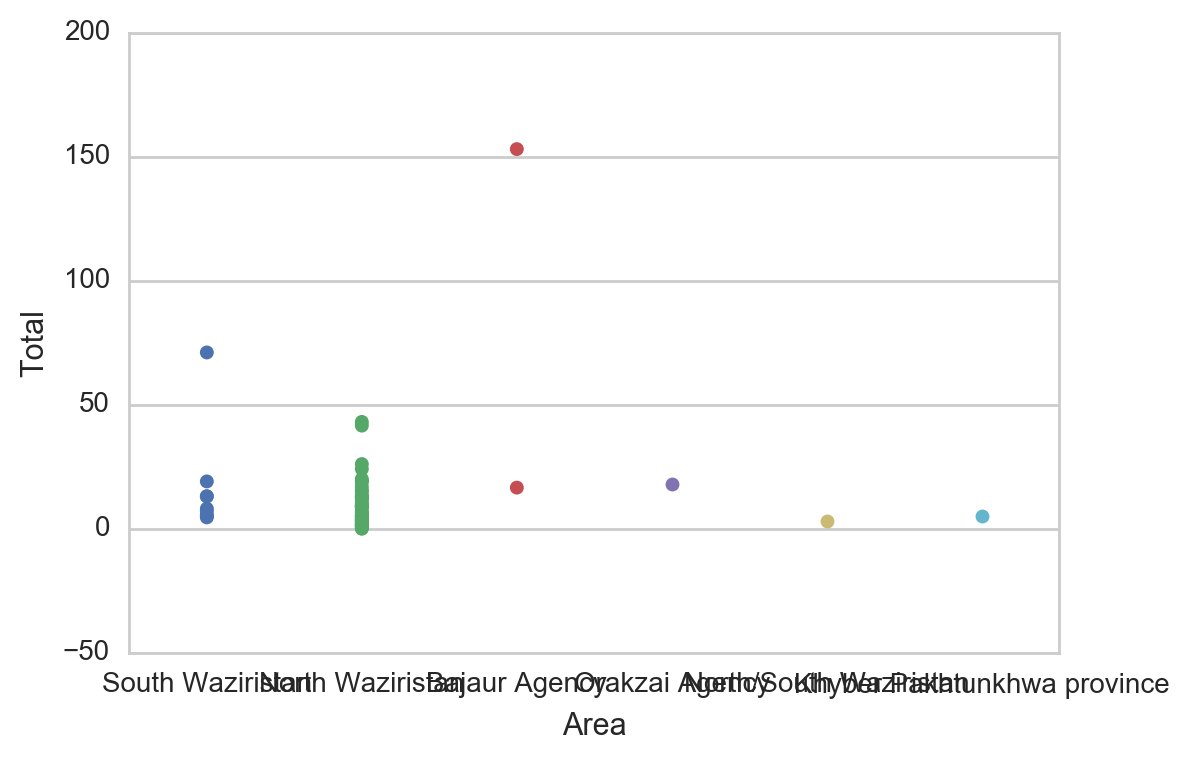

In [970]:
sns.stripplot(x="Area", y="Total", data=df6);

In [971]:
#It is crowdy here, so that I rename the Observasions
df6['Area'].replace(['North Waziristan','Khyber Pakhtunkhwa province','South Waziristan','Orakzai Agency','Bajaur Agency','North/South Waziristan'],['NW','KP','SW','OA','BA','SNK'],inplace=True)

In [972]:
df6

,Date,Area,Children killed,Injured,Civillians Killed,Total
0,6/17/04,SW,2.0,1.0,2.0,5.0
2,11/5/05,NW,2.5,1.0,5.5,9.0
5,10/30/06,BA,69.0,3.0,81.0,153.0
11,1/29/08,NW,2.5,1.5,5.0,9.0
14,5/14/08,BA,2.5,9.0,5.0,16.5
16,7/28/08,SW,1.0,3.0,3.0,7.0
21,8/30/08,NW,2.5,5.0,5.5,13.0
25,9/8/08,NW,6.5,19.5,15.5,41.5
26,9/12/08,NW,2.0,14.0,4.0,20.0
29,10/3/08,NW,1.0,5.0,3.0,9.0


SW:South Waziristan
NW:North Waziristan
BA:Bajaur Agency
OA:Orakzai Agency
SNK:South/North Waziristan
KP:Khyber Pakhtunkhwa province


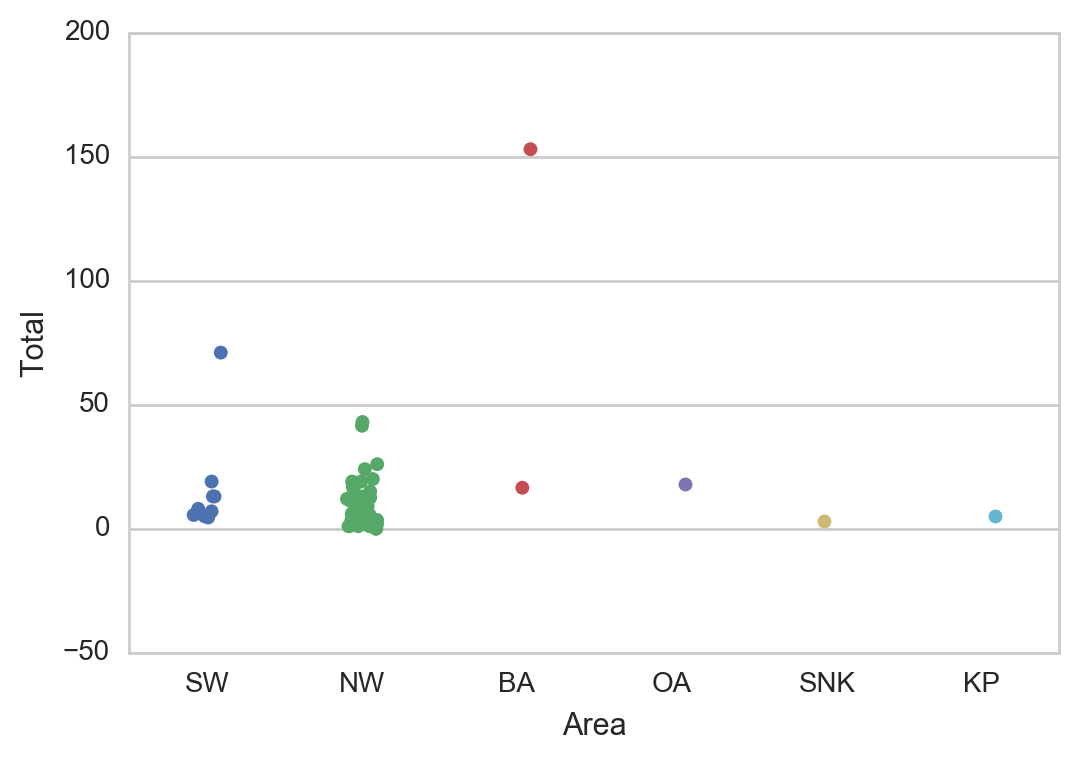

In [973]:
sns.stripplot(x="Area", y="Total", data=df6,jitter=True);
print 'SW:South Waziristan'
print 'NW:North Waziristan'
print 'BA:Bajaur Agency'
print 'OA:Orakzai Agency'
print 'SNK:South/North Waziristan'
print 'KP:Khyber Pakhtunkhwa province'

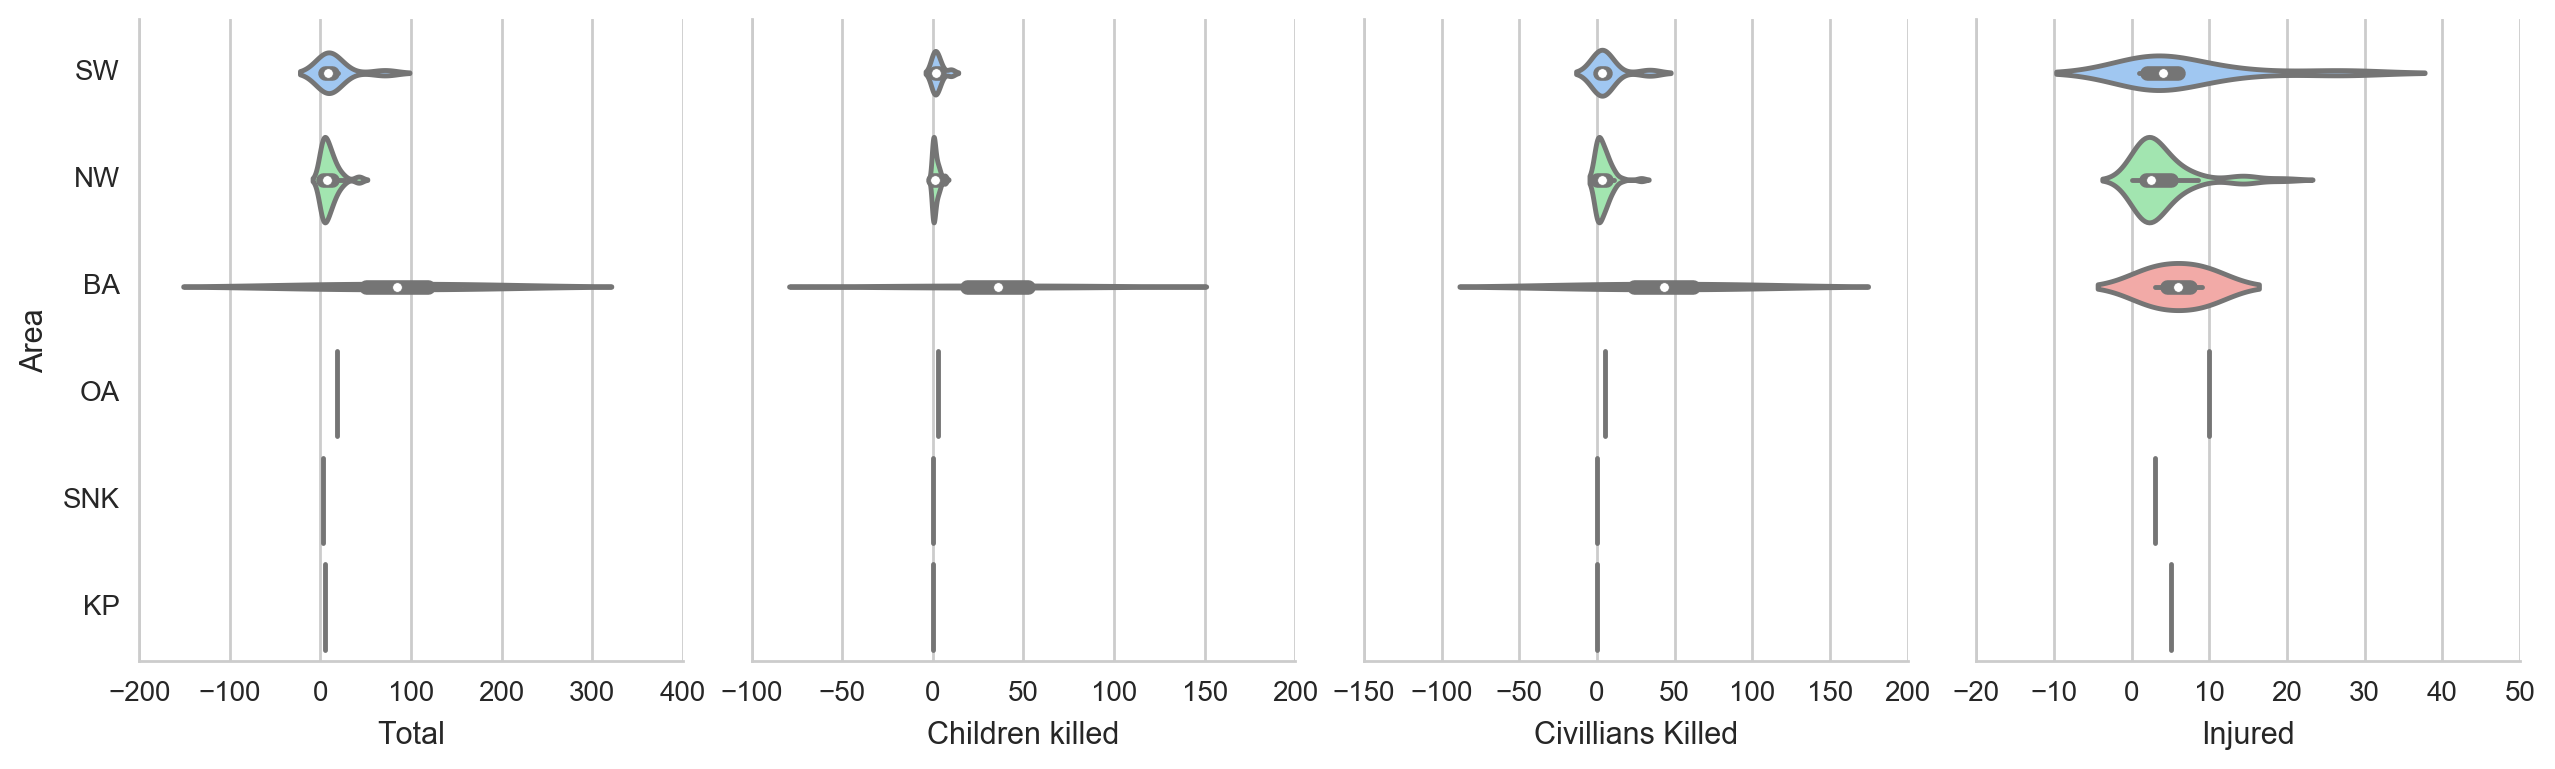

In [974]:
#Use violin plot to separate the victim type in each area
g = sns.PairGrid(df6,
                 y_vars=['Area'],
                 x_vars=['Total','Children killed','Civillians Killed','Injured'],
                 aspect=0.8, size=4)
g.map(sns.violinplot, palette="pastel");

In [975]:
#create a datafram for sum
dfs=pd.DataFrame({'Vicitim type':['Total','Injured]','Children Killed','Civillians Killed'],'Sum':[799,284,186,348]})
dfs

,Sum,Vicitim type
0,799,Total
1,284,Injured]
2,186,Children Killed
3,348,Civillians Killed


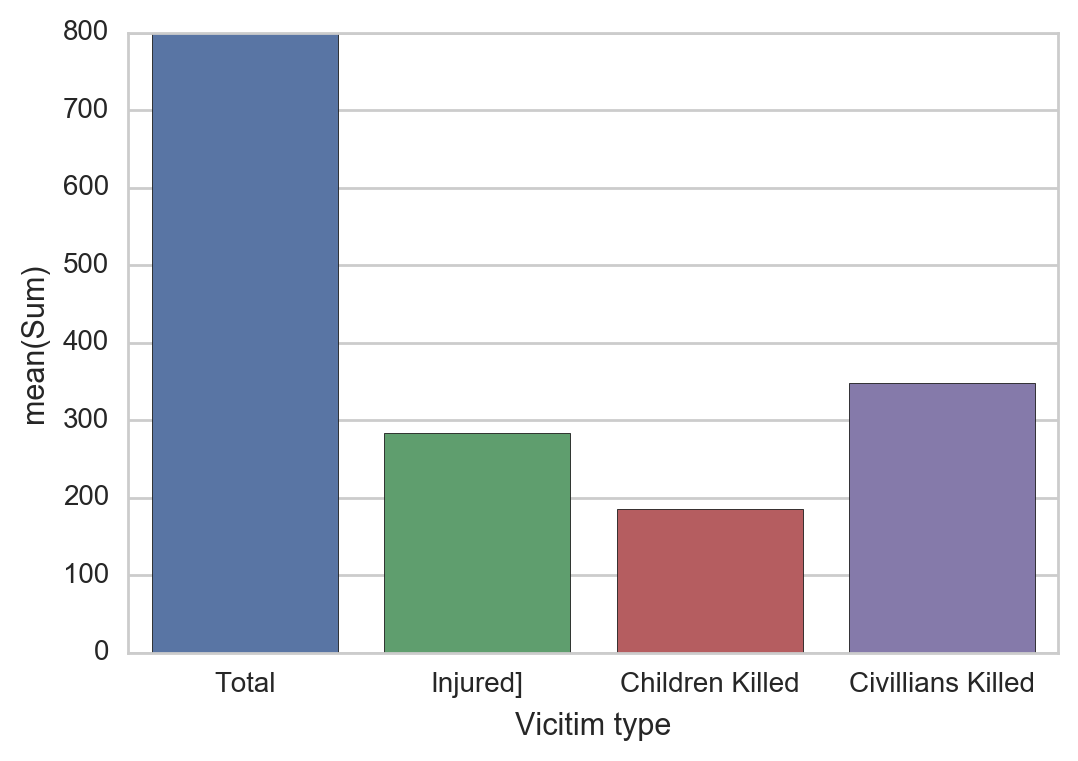

In [976]:
#ignore differences in area, let't have a look at the total number of each victim type
sns.barplot(x='Vicitim type', y='Sum', data=dfs,)

In [977]:
#This is the end of the first part

In [978]:
#Part 2 start here
#In this part I will try to find some possible relationships between viariables, without modeling, fine

In [979]:
#recall data frame
df

,Strike ID,Bureau ID,Date,Time,Location,Area,Target,Target Group,Westerners involved,Minimum Total Killed,...,Min injured,Max injured,Injured,Minimum children killed,Max children killed,Children Killed,Pakistani approval,Short Summary,Related ID,Notes
0,3,B1,6/17/04,1/0/00,Wana,South Waziristan,Nek Mohammed,NaN,NaN,6,...,1.0,1.0,At least 1,2.0,2.0,2,Likely,"First known drone strike in Pakistan kills 7, ...",NaN,NaN
1,4,B2,5/8/05,1/0/00,Toorikhel,North Waziristan,Haitham al-Yemeni,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,Likely,"Two killed, including al Qaeda operative, near...",NaN,NaN
2,5,B3,11/5/05,NaN,Mosaki,North Waziristan,Abu Hamza Rabia,NaN,NaN,8,...,1.0,1.0,1,2.0,3.0,3,NaN,Failed strike against Al Qaeda official kills ...,B4,NaN
3,6,B4,12/1/05,1/0/00,Haisori,North Waziristan,Abu Hamza Rabia,NaN,NaN,6,...,NaN,NaN,NaN,2.0,2.0,2,NaN,Three Al Qaeda killed along with two children....,B3; B39,NaN
4,8,B5,1/13/06,NaN,Damadola,Bajaur Agency,Ayman al-Zawahiri; Abu Khabab al-Masri; Abd Ra...,AQ,NaN,13,...,NaN,NaN,NaN,5.0,6.0,5,NaN,Failed strike on al Qaeda � with none killed d...,B19,NaN
5,9,B6,10/30/06,NaN,Chenegai,Bajaur Agency,Maulvi Liaqat,AQ,NaN,81,...,3.0,3.0,NaN,68.0,70.0,68-70,NaN,"82 killed, including up to 69 children, in att...",NaN,NaN
6,10,B7,1/16/07,1/0/00,Zamazola,South Waziristan,NaN,Taliban,NaN,8,...,NaN,NaN,Unknown,1.0,1.0,1,NaN,`,NaN,NaN
7,11,B8,4/27/07,1/0/00,Saidgai,North Waziristan,Maulvi Noor Mohammed,Taliban,NaN,3,...,3.0,9.0,3,NaN,NaN,NaN,NaN,"Four killed, reportedly all named civilians, i...",NaN,NaN
8,12,B9,6/19/07,1/0/00,Mami Rogha,North Waziristan,NaN,Unknown,NaN,20,...,10.0,15.0,10-15,NaN,NaN,Possibly,NaN,"20-34 killed in attack on madrassa, including ...",NaN,NaN
9,13,B10,11/2/07,1/0/00,Danda Darpakhel,North Waziristan,Jalalludin Haqqani,Haqqani,NaN,5,...,6.0,12.0,6-12,NaN,NaN,NaN,NaN,Attack kills 5-10 alleged Haqqani militants. D...,NaN,NaN


In [980]:
#part2--01
#If the injuring and death number is decreasing as time goes byhave we learnt from such a sacrifice?


In [981]:
df['Date']=pd.to_datetime(df['Date'])
df.sort('Date')

/Users/lilexin/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Strike ID,Bureau ID,Date,Time,Location,Area,Target,Target Group,Westerners involved,Minimum Total Killed,...,Min injured,Max injured,Injured,Minimum children killed,Max children killed,Children Killed,Pakistani approval,Short Summary,Related ID,Notes
0,3,B1,2004-06-17,1/0/00,Wana,South Waziristan,Nek Mohammed,NaN,NaN,6,...,1.0,1.0,At least 1,2.0,2.0,2,Likely,"First known drone strike in Pakistan kills 7, ...",NaN,NaN
1,4,B2,2005-05-08,1/0/00,Toorikhel,North Waziristan,Haitham al-Yemeni,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,Likely,"Two killed, including al Qaeda operative, near...",NaN,NaN
2,5,B3,2005-11-05,NaN,Mosaki,North Waziristan,Abu Hamza Rabia,NaN,NaN,8,...,1.0,1.0,1,2.0,3.0,3,NaN,Failed strike against Al Qaeda official kills ...,B4,NaN
3,6,B4,2005-12-01,1/0/00,Haisori,North Waziristan,Abu Hamza Rabia,NaN,NaN,6,...,NaN,NaN,NaN,2.0,2.0,2,NaN,Three Al Qaeda killed along with two children....,B3; B39,NaN
4,8,B5,2006-01-13,NaN,Damadola,Bajaur Agency,Ayman al-Zawahiri; Abu Khabab al-Masri; Abd Ra...,AQ,NaN,13,...,NaN,NaN,NaN,5.0,6.0,5,NaN,Failed strike on al Qaeda � with none killed d...,B19,NaN
5,9,B6,2006-10-30,NaN,Chenegai,Bajaur Agency,Maulvi Liaqat,AQ,NaN,81,...,3.0,3.0,NaN,68.0,70.0,68-70,NaN,"82 killed, including up to 69 children, in att...",NaN,NaN
6,10,B7,2007-01-16,1/0/00,Zamazola,South Waziristan,NaN,Taliban,NaN,8,...,NaN,NaN,Unknown,1.0,1.0,1,NaN,`,NaN,NaN
7,11,B8,2007-04-27,1/0/00,Saidgai,North Waziristan,Maulvi Noor Mohammed,Taliban,NaN,3,...,3.0,9.0,3,NaN,NaN,NaN,NaN,"Four killed, reportedly all named civilians, i...",NaN,NaN
8,12,B9,2007-06-19,1/0/00,Mami Rogha,North Waziristan,NaN,Unknown,NaN,20,...,10.0,15.0,10-15,NaN,NaN,Possibly,NaN,"20-34 killed in attack on madrassa, including ...",NaN,NaN
9,13,B10,2007-11-02,1/0/00,Danda Darpakhel,North Waziristan,Jalalludin Haqqani,Haqqani,NaN,5,...,6.0,12.0,6-12,NaN,NaN,NaN,NaN,Attack kills 5-10 alleged Haqqani militants. D...,NaN,NaN


In [982]:
df22=df.drop(['Strike ID','Bureau ID','Time','Location','Area','Target','Target Group','Westerners involved','Pakistani approval','Short Summary','Related ID','Notes'],axis=1)

In [983]:
df22

,Date,Minimum Total Killed,Mean Total Killed,Maximum Total Killed,Number of deaths,AQ/TB Killed,Minimum civilians killed,Maximum civilians killed,Civilians Killed,Min injured,Max injured,Injured,Minimum children killed,Max children killed,Children Killed
0,2004-06-17,6,7.0,8,6-8,5,2.0,2.0,2,1.0,1.0,At least 1,2.0,2.0,2
1,2005-05-08,2,2.0,2,2,1 al-Qaeda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-11-05,8,8.0,8,8,0,3.0,8.0,3-8,1.0,1.0,1,2.0,3.0,3
3,2005-12-01,6,5.0,6,5,1 al-Qaeda,2.0,3.0,2,NaN,NaN,NaN,2.0,2.0,2
4,2006-01-13,13,20.0,22,13-22,0-4,10.0,18.0,10-18,NaN,NaN,NaN,5.0,6.0,5
5,2006-10-30,81,82.0,83,81-83,NaN,80.0,82.0,80-82,3.0,3.0,NaN,68.0,70.0,68-70
6,2007-01-16,8,8.0,8,8,NaN,8.0,8.0,8,NaN,NaN,Unknown,1.0,1.0,1
7,2007-04-27,3,4.0,4,3-4,0-4,3.0,4.0,4,3.0,9.0,3,NaN,NaN,NaN
8,2007-06-19,20,27.0,34,20-34,NaN,0.0,34.0,0-34,10.0,15.0,10-15,NaN,NaN,Possibly
9,2007-11-02,5,8.0,10,5-10,5-10,NaN,NaN,NaN,6.0,12.0,6-12,NaN,NaN,NaN


In [984]:
df22['Injured']=(df22['Min injured']+df22['Max injured'])/2
df22['Children killed']=(df22['Max children killed']+df22['Minimum children killed'])/2
df22['Civillians killed']=(df22['Maximum civilians killed']+df22['Minimum civilians killed'])/2
df22

,Date,Minimum Total Killed,Mean Total Killed,Maximum Total Killed,Number of deaths,AQ/TB Killed,Minimum civilians killed,Maximum civilians killed,Civilians Killed,Min injured,Max injured,Injured,Minimum children killed,Max children killed,Children Killed,Children killed,Civillians killed
0,2004-06-17,6,7.0,8,6-8,5,2.0,2.0,2,1.0,1.0,1.0,2.0,2.0,2,2.0,2.0
1,2005-05-08,2,2.0,2,2,1 al-Qaeda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-11-05,8,8.0,8,8,0,3.0,8.0,3-8,1.0,1.0,1.0,2.0,3.0,3,2.5,5.5
3,2005-12-01,6,5.0,6,5,1 al-Qaeda,2.0,3.0,2,NaN,NaN,NaN,2.0,2.0,2,2.0,2.5
4,2006-01-13,13,20.0,22,13-22,0-4,10.0,18.0,10-18,NaN,NaN,NaN,5.0,6.0,5,5.5,14.0
5,2006-10-30,81,82.0,83,81-83,NaN,80.0,82.0,80-82,3.0,3.0,3.0,68.0,70.0,68-70,69.0,81.0
6,2007-01-16,8,8.0,8,8,NaN,8.0,8.0,8,NaN,NaN,NaN,1.0,1.0,1,1.0,8.0
7,2007-04-27,3,4.0,4,3-4,0-4,3.0,4.0,4,3.0,9.0,6.0,NaN,NaN,NaN,NaN,3.5
8,2007-06-19,20,27.0,34,20-34,NaN,0.0,34.0,0-34,10.0,15.0,12.5,NaN,NaN,Possibly,NaN,17.0
9,2007-11-02,5,8.0,10,5-10,5-10,NaN,NaN,NaN,6.0,12.0,9.0,NaN,NaN,NaN,NaN,NaN


In [985]:
df23=df22.drop(['Minimum Total Killed','Maximum Total Killed','Number of deaths','AQ/TB Killed','Minimum civilians killed','Maximum civilians killed','Min injured','Mean Total Killed','Max injured','Minimum children killed','Max children killed','Civilians Killed','Children Killed'],axis=1)

In [986]:
df23.dropna(how='any',inplace=True)
df23

,Date,Injured,Children killed,Civillians killed
0,2004-06-17,1.0,2.0,2.0
2,2005-11-05,1.0,2.5,5.5
5,2006-10-30,3.0,69.0,81.0
11,2008-01-29,1.5,2.5,5.0
14,2008-05-14,9.0,2.5,5.0
16,2008-07-28,3.0,1.0,3.0
21,2008-08-30,5.0,2.5,5.5
25,2008-09-08,19.5,6.5,15.5
26,2008-09-12,14.0,2.0,4.0
29,2008-10-03,5.0,1.0,3.0


In [987]:
df23.shape

(62, 4)

In [988]:
#without running regression, I can only tell the possibility of corelation by graph


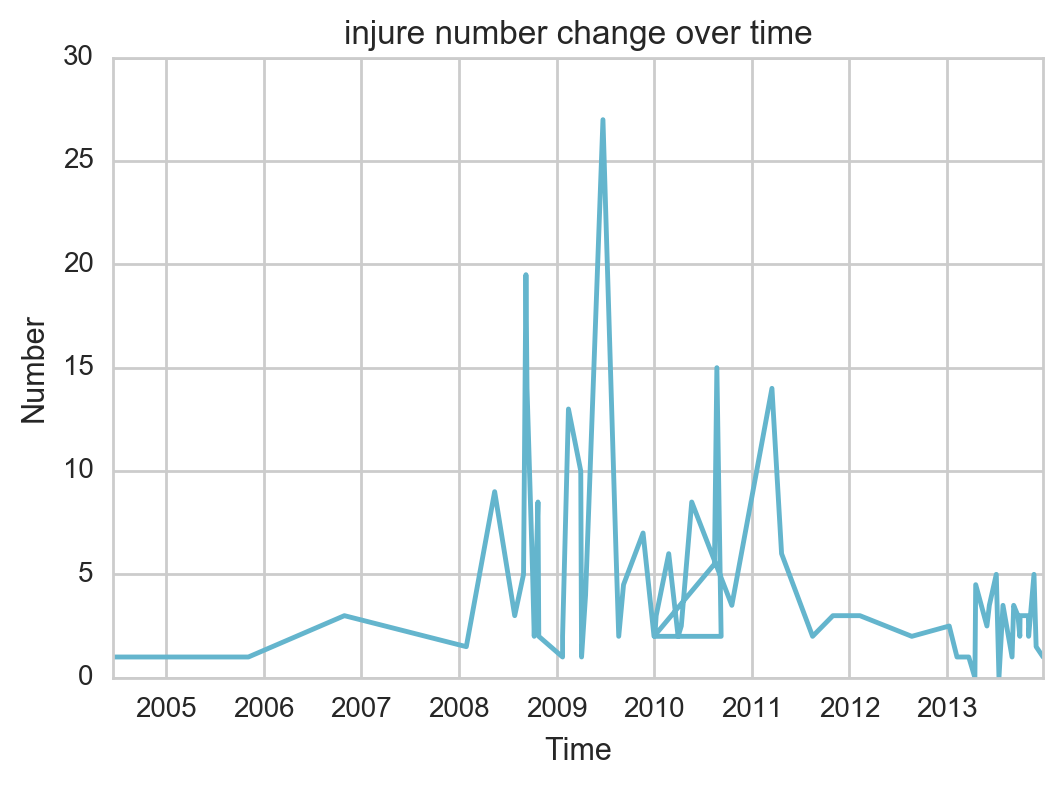

In [989]:
plt.plot(df23['Date'],df23['Injured'],color='c')

plt.title('injure number change over time')
plt.xlabel('Time')
plt.ylabel('Number')


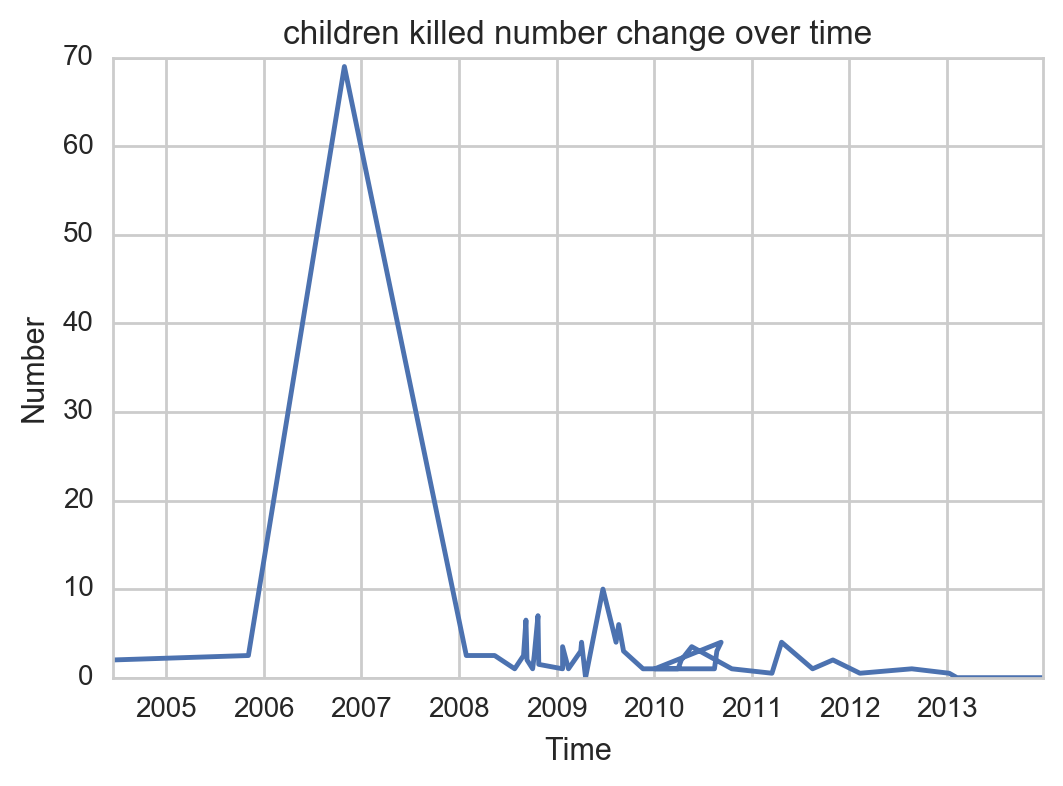

In [990]:
plt.plot(df23['Date'],df23['Children killed'],color='b')

plt.title('children killed number change over time')
plt.xlabel('Time')
plt.ylabel('Number')

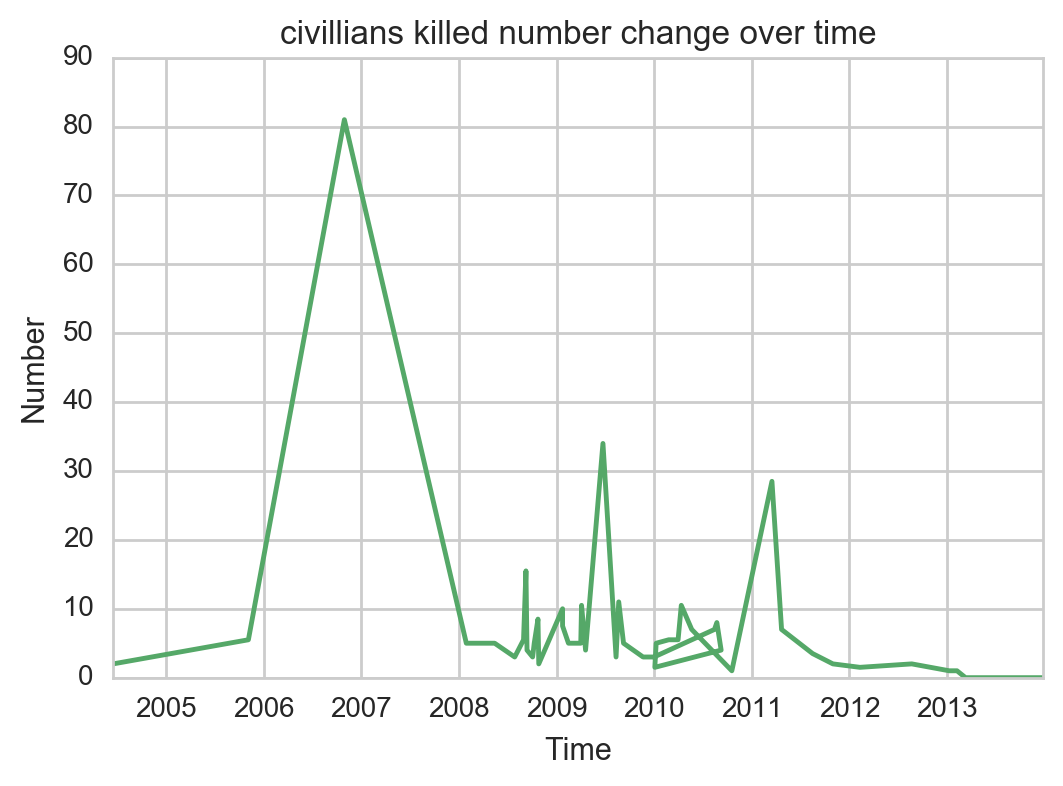

In [991]:
plt.plot(df23['Date'],df23['Civillians killed'],c='g')

plt.title('civillians killed number change over time')
plt.xlabel('Time')
plt.ylabel('Number')


In [992]:
#Visually, it looks like the number of victims is decreasing after 2007(apex), but the total number of injuring does not decrease at all befor 2011
#after 2011 , both the number of injuring and death decrease.

In [993]:
#part2--02


In [994]:
#In part 2--02 I will try to draw a histogram about the number of total attacks over time


In [995]:
#recall data frama 'df'

In [996]:
df

,Strike ID,Bureau ID,Date,Time,Location,Area,Target,Target Group,Westerners involved,Minimum Total Killed,...,Min injured,Max injured,Injured,Minimum children killed,Max children killed,Children Killed,Pakistani approval,Short Summary,Related ID,Notes
0,3,B1,2004-06-17,1/0/00,Wana,South Waziristan,Nek Mohammed,NaN,NaN,6,...,1.0,1.0,At least 1,2.0,2.0,2,Likely,"First known drone strike in Pakistan kills 7, ...",NaN,NaN
1,4,B2,2005-05-08,1/0/00,Toorikhel,North Waziristan,Haitham al-Yemeni,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,Likely,"Two killed, including al Qaeda operative, near...",NaN,NaN
2,5,B3,2005-11-05,NaN,Mosaki,North Waziristan,Abu Hamza Rabia,NaN,NaN,8,...,1.0,1.0,1,2.0,3.0,3,NaN,Failed strike against Al Qaeda official kills ...,B4,NaN
3,6,B4,2005-12-01,1/0/00,Haisori,North Waziristan,Abu Hamza Rabia,NaN,NaN,6,...,NaN,NaN,NaN,2.0,2.0,2,NaN,Three Al Qaeda killed along with two children....,B3; B39,NaN
4,8,B5,2006-01-13,NaN,Damadola,Bajaur Agency,Ayman al-Zawahiri; Abu Khabab al-Masri; Abd Ra...,AQ,NaN,13,...,NaN,NaN,NaN,5.0,6.0,5,NaN,Failed strike on al Qaeda � with none killed d...,B19,NaN
5,9,B6,2006-10-30,NaN,Chenegai,Bajaur Agency,Maulvi Liaqat,AQ,NaN,81,...,3.0,3.0,NaN,68.0,70.0,68-70,NaN,"82 killed, including up to 69 children, in att...",NaN,NaN
6,10,B7,2007-01-16,1/0/00,Zamazola,South Waziristan,NaN,Taliban,NaN,8,...,NaN,NaN,Unknown,1.0,1.0,1,NaN,`,NaN,NaN
7,11,B8,2007-04-27,1/0/00,Saidgai,North Waziristan,Maulvi Noor Mohammed,Taliban,NaN,3,...,3.0,9.0,3,NaN,NaN,NaN,NaN,"Four killed, reportedly all named civilians, i...",NaN,NaN
8,12,B9,2007-06-19,1/0/00,Mami Rogha,North Waziristan,NaN,Unknown,NaN,20,...,10.0,15.0,10-15,NaN,NaN,Possibly,NaN,"20-34 killed in attack on madrassa, including ...",NaN,NaN
9,13,B10,2007-11-02,1/0/00,Danda Darpakhel,North Waziristan,Jalalludin Haqqani,Haqqani,NaN,5,...,6.0,12.0,6-12,NaN,NaN,NaN,NaN,Attack kills 5-10 alleged Haqqani militants. D...,NaN,NaN


In [997]:
df24=df.drop(['Strike ID','Bureau ID','Time','Area','Location','Target','Target Group','Westerners involved','Injured','Pakistani approval','Short Summary','Related ID','Notes','Minimum Total Killed','Maximum Total Killed','Number of deaths','AQ/TB Killed','Minimum civilians killed','Maximum civilians killed','Min injured','Mean Total Killed','Max injured','Minimum children killed','Max children killed','Civilians Killed','Children Killed'],axis=1)
df24.head(5)

,Date
0,2004-06-17
1,2005-05-08
2,2005-11-05
3,2005-12-01
4,2006-01-13


In [998]:
# now I need a variable to count the attacks

In [999]:
df24['count']=1

In [1000]:
df24.head(5)

,Date,count
0,2004-06-17,1
1,2005-05-08,1
2,2005-11-05,1
3,2005-12-01,1
4,2006-01-13,1


In [1001]:
pd.to_datetime(df24['Date'])

0     2004-06-17
1     2005-05-08
2     2005-11-05
3     2005-12-01
4     2006-01-13
5     2006-10-30
6     2007-01-16
7     2007-04-27
8     2007-06-19
9     2007-11-02
10    2007-12-03
11    2008-01-29
12    2008-02-28
13    2008-03-16
14    2008-05-14
15    2008-06-14
16    2008-07-28
17    2008-08-12
18    2008-08-20
19    2008-08-27
20    2008-08-30
21    2008-08-30
22    2008-09-02
23    2008-09-04
24    2008-09-05
25    2008-09-08
26    2008-09-12
27    2008-09-17
28    2008-09-30
29    2008-10-03
         ...    
351   2012-12-09
352   2012-12-21
353   2012-12-29
354   2013-01-02
355   2013-01-03
356   2013-01-06
357   2013-01-08
358   2013-01-08
359   2013-01-10
360   2013-02-06
361   2013-02-08
362   2013-03-10
363   2013-03-22
364   2013-04-14
365   2013-04-17
366   2013-05-29
367   2013-06-07
368   2013-07-03
369   2013-07-13
370   2013-07-28
371   2013-08-31
372   2013-09-06
373   2013-09-22
374   2013-09-29
375   2013-09-30
376   2013-10-31
377   2013-11-01
378   2013-11-

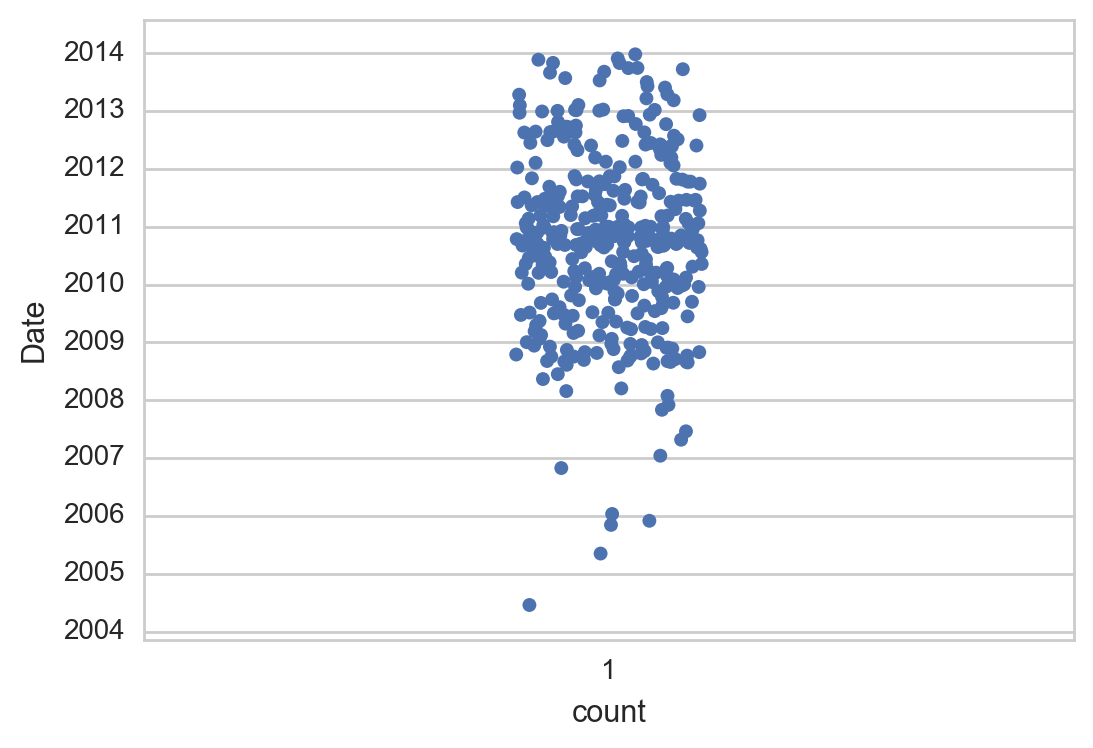

In [1002]:

sns.stripplot(y="Date", x="count", data=df24,jitter=True)
#It looks like there weres intense attacks between 2009-2012


In [1003]:
#Part2 -02 ends here


In [1004]:
#part2- 03  Towards which Target Group, will the drone attack cause more civillian injuring(AQ or TB)

In [1005]:
#recall DateFrame 5
df5

,Date,Area,Children killed,Injured,Civillians Killed,Total
0,6/17/04,South Waziristan,2.0,1.0,2.0,5.0
1,5/8/05,North Waziristan,NaN,NaN,NaN,NaN
2,11/5/05,North Waziristan,2.5,1.0,5.5,9.0
3,12/1/05,North Waziristan,2.0,NaN,2.5,NaN
4,1/13/06,Bajaur Agency,5.5,NaN,14.0,NaN
5,10/30/06,Bajaur Agency,69.0,3.0,81.0,153.0
6,1/16/07,South Waziristan,1.0,NaN,8.0,NaN
7,4/27/07,North Waziristan,NaN,6.0,3.5,NaN
8,6/19/07,North Waziristan,NaN,12.5,17.0,NaN
9,11/2/07,North Waziristan,NaN,9.0,NaN,NaN


In [1006]:
#append the target 
target=df['Target Group']

In [1007]:
df31=df5
df31["Target"]=target

In [1008]:
df31

,Date,Area,Children killed,Injured,Civillians Killed,Total,Target
0,6/17/04,South Waziristan,2.0,1.0,2.0,5.0,NaN
1,5/8/05,North Waziristan,NaN,NaN,NaN,NaN,NaN
2,11/5/05,North Waziristan,2.5,1.0,5.5,9.0,NaN
3,12/1/05,North Waziristan,2.0,NaN,2.5,NaN,NaN
4,1/13/06,Bajaur Agency,5.5,NaN,14.0,NaN,AQ
5,10/30/06,Bajaur Agency,69.0,3.0,81.0,153.0,AQ
6,1/16/07,South Waziristan,1.0,NaN,8.0,NaN,Taliban
7,4/27/07,North Waziristan,NaN,6.0,3.5,NaN,Taliban
8,6/19/07,North Waziristan,NaN,12.5,17.0,NaN,Unknown
9,11/2/07,North Waziristan,NaN,9.0,NaN,NaN,Haqqani


In [1009]:
df32=df31.drop(['Injured','Total','Children killed'],axis=1)

In [1010]:
df32
df32.dropna(how='any')

,Date,Area,Civillians Killed,Target
4,1/13/06,Bajaur Agency,14.0,AQ
5,10/30/06,Bajaur Agency,81.0,AQ
6,1/16/07,South Waziristan,8.0,Taliban
7,4/27/07,North Waziristan,3.5,Taliban
8,6/19/07,North Waziristan,17.0,Unknown
11,1/29/08,North Waziristan,5.0,AQ
12,2/28/08,South Waziristan,0.0,Unknown
13,3/16/08,South Waziristan,2.0,AQ
14,5/14/08,Bajaur Agency,5.0,AQ
15,6/14/08,South Waziristan,0.5,Taliban


In [1011]:

df33=df32.groupby(['Target'], sort=True)[['Civillians Killed']].mean().sort_values(by=['Civillians Killed'], ascending=False).reset_index()
df33

,Target,Civillians Killed
0,Pakistan Taliban,18.250000
1,AQ,13.200000
2,al-Badr,10.500000
3,Haqqani; al-Qaeda,7.333333
4,Pakistan Taliban or Haqqani,7.000000
5,Unknown,4.625000
6,Taliban; al-Qaeda,4.200000
7,Hafiz Gul Bahadur,4.166667
8,Haqqani,4.035714
9,Haqqani?,4.000000


In [1012]:
df33.dropna(how='any')

,Target,Civillians Killed
0,Pakistan Taliban,18.250000
1,AQ,13.200000
2,al-Badr,10.500000
3,Haqqani; al-Qaeda,7.333333
4,Pakistan Taliban or Haqqani,7.000000
5,Unknown,4.625000
6,Taliban; al-Qaeda,4.200000
7,Hafiz Gul Bahadur,4.166667
8,Haqqani,4.035714
9,Haqqani?,4.000000


In [1013]:
df33['Target'].replace(to_replace='Al Qaeda',value='AQ',inplace=True)
df33['Target'].replace(to_replace='TTP',value='Taliban',inplace=True)
df33['Target'].replace(to_replace='Haqqani?',value='Haqqani',inplace=True)
df33['Target'].replace(to_replace='Pakistan Taliban',value='Taliban',inplace=True)

In [1014]:
df33

,Target,Civillians Killed
0,Taliban,18.250000
1,AQ,13.200000
2,al-Badr,10.500000
3,Haqqani; al-Qaeda,7.333333
4,Pakistan Taliban or Haqqani,7.000000
5,Unknown,4.625000
6,Taliban; al-Qaeda,4.200000
7,Hafiz Gul Bahadur,4.166667
8,Haqqani,4.035714
9,Haqqani,4.000000


In [1015]:
df34=df33.groupby(['Target'], sort=True)[['Civillians Killed']].mean().sort_values(by=['Civillians Killed'], ascending=False).reset_index()
df34

,Target,Civillians Killed
0,al-Badr,10.500000
1,Haqqani; al-Qaeda,7.333333
2,Taliban,7.283333
3,AQ,7.225000
4,Pakistan Taliban or Haqqani,7.000000
5,Unknown,4.625000
6,Taliban; al-Qaeda,4.200000
7,Hafiz Gul Bahadur,4.166667
8,Haqqani,4.017857
9,Nazir,3.625000


In [1016]:
df34=df34[df34.Target != 'Maulvi Nazir']
df34=df34[df34.Target != 'TTP or AQ']
df34=df34[df34.Target != 'Hafiz Gul Bahadur?']
df34=df34[df34.Target != 'IMU']
df34=df34[df34.Target != 'Nazir?']
df34=df34[df34.Target != 'Swat Taliban']
df34=df34[df34.Target != 'al-Qaeda']
df34



,Target,Civillians Killed
0,al-Badr,10.500000
1,Haqqani; al-Qaeda,7.333333
2,Taliban,7.283333
3,AQ,7.225000
4,Pakistan Taliban or Haqqani,7.000000
5,Unknown,4.625000
6,Taliban; al-Qaeda,4.200000
7,Hafiz Gul Bahadur,4.166667
8,Haqqani,4.017857
9,Nazir,3.625000


In [1017]:
df34.set_index('Target')

,Civillians Killed
Target,
al-Badr,10.500000
Haqqani; al-Qaeda,7.333333
Taliban,7.283333
AQ,7.225000
Pakistan Taliban or Haqqani,7.000000
Unknown,4.625000
Taliban; al-Qaeda,4.200000
Hafiz Gul Bahadur,4.166667
Haqqani,4.017857


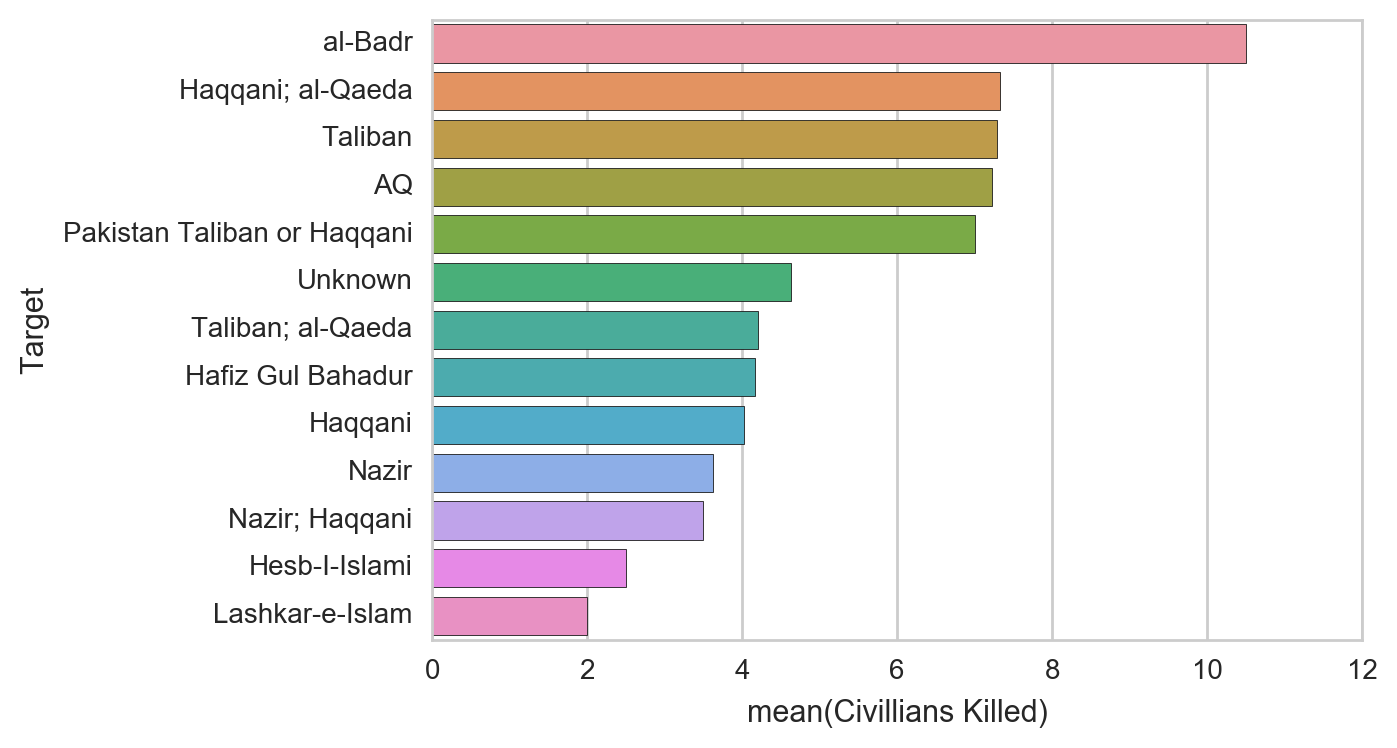

In [1018]:
#Now add the repeat value mannully
sns.barplot(x="Civillians Killed", y="Target", data=df34);


In [1019]:
#Part 2--03 ends here


In [ ]:
#Project one ends